## Exoplanet M-R Relationship

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# importing data using pandas instead because of error above
exoplanet_sample = pd.read_csv('PSCompPars_2023.03.30_10.09.33.csv', delimiter=',', header = 0, encoding='utf-8')

# print the names of the fields in the array
print(exoplanet_sample.dtypes)

pl_name             object
hostname            object
sy_snum              int64
sy_pnum              int64
discoverymethod     object
                    ...   
sy_kmagerr1        float64
sy_kmagerr2        float64
sy_gaiamag         float64
sy_gaiamagerr1     float64
sy_gaiamagerr2     float64
Length: 84, dtype: object


## Cutting Data

In [81]:
# cutting out non main sequence stars
for i in exoplanet_sample['st_spectype']:
    if np.logical_and(np.logical_and('M' not in i, 'F' not in i), np.logical_and('G' not in i, 'K' not in i)):
        exoplanet_sample.drop(exoplanet_sample.index[(exoplanet_sample["st_spectype"] == i)], axis=0, inplace = True)

exoplanet_sample['st_spectype']

0       G8 III
1       K4 III
2       K0 III
3         K0 V
4         G3 V
         ...  
5307      F8 V
5308      F8 V
5309      F8 V
5310    G9 III
5311    G9 III
Name: st_spectype, Length: 1847, dtype: object

In [82]:
# obtaining transiting planets from Kepler, K2, and TESS missions
exoplanet_sample = exoplanet_sample[exoplanet_sample['discoverymethod'] == 'Transit']

exoplanet_sample = exoplanet_sample[np.logical_or(np.logical_or(exoplanet_sample['disc_facility'] == 'K2', exoplanet_sample['disc_facility'] == 'Transiting Exoplanet Survey Satellite (TESS)'),
                                                   exoplanet_sample['disc_facility'] == 'Kepler')]

# cutting out binary systems
exoplanet_sample = exoplanet_sample[exoplanet_sample['sy_snum'] == 1.0]

# cutting out planets whose masses were determined by MR relationship (that's what were trying to show)
exoplanet_sample = exoplanet_sample[exoplanet_sample['pl_bmassprov'] != 'M-R relationship']

# cutting out stars without well-defined radius
exoplanet_sample = exoplanet_sample[exoplanet_sample['st_rad'] != 0.0]
                                              
# applying limits on planet radii and mass
exoplanet_sample = exoplanet_sample[np.logical_and(exoplanet_sample['pl_rade'] < 8.0,
                                                   exoplanet_sample['pl_rade'] > 0.0)]

exoplanet_sample = exoplanet_sample[np.logical_and(exoplanet_sample['pl_bmasse'] > 0.0, 
                                                   exoplanet_sample['pl_bmasse'] < 70.0)]

# cutting out all exoplanets that don't have error bars on radius/mass measurements
exoplanet_sample = exoplanet_sample[exoplanet_sample['st_masserr1'] != 0.0]
exoplanet_sample = exoplanet_sample[exoplanet_sample['st_masserr2'] != 0.0]

exoplanet_sample = exoplanet_sample[exoplanet_sample['pl_radeerr1'] != 0.0]
exoplanet_sample = exoplanet_sample[exoplanet_sample['pl_radeerr2'] != 0.0]
exoplanet_sample = exoplanet_sample[exoplanet_sample['pl_bmasseerr1'] != 0.0]
exoplanet_sample = exoplanet_sample[exoplanet_sample['pl_bmasseerr2'] != 0.0]

# separating sample into the three telescopes 
K = exoplanet_sample[exoplanet_sample['disc_facility'] == 'Kepler']
K2 = exoplanet_sample[exoplanet_sample['disc_facility'] == 'K2']
TESS = exoplanet_sample[exoplanet_sample['disc_facility'] == 'Transiting Exoplanet Survey Satellite (TESS)']

In [83]:
len(exoplanet_sample)

169

## Sorting out planet M-R data and stellar M-R data then taking the log.

In [84]:
# planet MR and stellar MR data (total)
Mp = exoplanet_sample['pl_bmasse']
Mp_errup = abs(exoplanet_sample['pl_bmasseerr1'])
Mp_errlow = abs(exoplanet_sample['pl_bmasseerr2'])

Mplog = np.log(Mp)
Mp_erruplog = Mp_errup / Mp
Mp_errlowlog = Mp_errlow / Mp

Rp = exoplanet_sample['pl_rade']
Rplog = np.log(Rp)

Rp_errup = abs(exoplanet_sample['pl_radeerr1'])
Rp_errlow = abs(exoplanet_sample['pl_radeerr2'])
Rp_erruplog = Rp_errup / Rp
Rp_errlowlog = Rp_errlow / Rp

In [85]:
# planet MR and stellar MR data (Kepler)
Km = K['pl_bmasse']
Km_errup = abs(K['pl_bmasseerr1'])
Km_errlow = abs(K['pl_bmasseerr2'])

Kmlog = np.log(K['pl_bmasse'])
Km_erruplog = abs(K['pl_bmasseerr1']) / Km
Km_errlowlog = abs(K['pl_bmasseerr2']) / Km

Kr = K['pl_rade']
Kr_errup = abs(K['pl_radeerr1'])
Kr_errlow = abs(K['pl_radeerr2'])

Krlog = np.log(K['pl_rade'])
Kr_erruplog = abs(K['pl_radeerr1']) / Kr
Kr_errlowlog = abs(K['pl_radeerr2']) /Kr

In [86]:
# planet MR and stellar MR data (Kepler 2)
K2m = K2['pl_bmasse']
K2m_errup = abs(K2['pl_bmasseerr1'])
K2m_errlow = abs(K2['pl_bmasseerr2'])

K2mlog = np.log(K2['pl_bmasse'])
K2m_erruplog = abs(K2['pl_bmasseerr1']) / K2m
K2m_errlowlog = abs(K2['pl_bmasseerr2']) /K2m

K2r = K2['pl_rade']
K2r_errup = abs(K2['pl_radeerr1'])
K2r_errlow = abs(K2['pl_radeerr2'])

K2rlog = np.log(K2['pl_rade'])
K2r_erruplog = abs(K2['pl_radeerr1']) / K2r
K2r_errlowlog = abs(K2['pl_radeerr2']) /K2r

In [87]:
# planet MR and stellar MR data (TESS)
TESSm = TESS['pl_bmasse']
TESSm_errup = abs(TESS['pl_bmasseerr1'])
TESSm_errlow = abs(TESS['pl_bmasseerr2'])

TESSmlog = np.log(TESS['pl_bmasse'])
TESSm_erruplog = abs(TESS['pl_bmasseerr1']) / TESSm
TESSm_errlowlog = abs(TESS['pl_bmasseerr2']) / TESSm

TESSr = TESS['pl_rade']
TESSr_errup = abs(TESS['pl_radeerr1'])
TESSr_errlow = abs(TESS['pl_radeerr2'])

TESSrlog = np.log(TESS['pl_rade'])
TESSr_erruplog = abs(TESS['pl_radeerr1']) / TESSr
TESSr_errlowlog = abs(TESS['pl_radeerr2']) / TESSr

## Plotting M-R Data

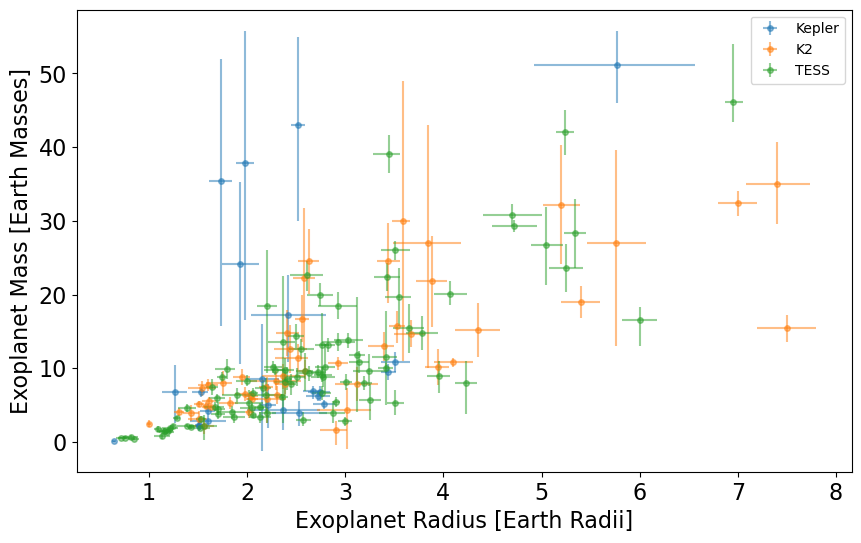

In [88]:
plt.figure(figsize = (10,6))
plt.errorbar(Kr, Km, xerr = (Kr_errup, Kr_errlow), yerr = (Km_errup, Km_errlow),
             linestyle = 'None', marker ='.', alpha = 0.5, ms=8, label = 'Kepler')
plt.errorbar(K2r, K2m, xerr = (K2r_errup, K2r_errlow), yerr = (K2m_errup, K2m_errlow),
             linestyle = 'None', marker ='.', alpha = 0.5, ms=8,  label = 'K2')
plt.errorbar(TESSr, TESSm, xerr = (TESSr_errup, TESSr_errlow), yerr = (TESSm_errup, TESSm_errlow),
             linestyle = 'None', marker ='.', alpha = 0.5, ms=8,  label = 'TESS')

plt.ylabel('Exoplanet Mass [Earth Masses]')
plt.xlabel('Exoplanet Radius [Earth Radii]')

plt.legend(fontsize = 10)
plt.show()

What is more illuminating is the log of the data, since it appears that the M-R data above follows a power law, and therefore the log may follow a linear relationship which is simple to fit with Bayesian Inference/MCMC.

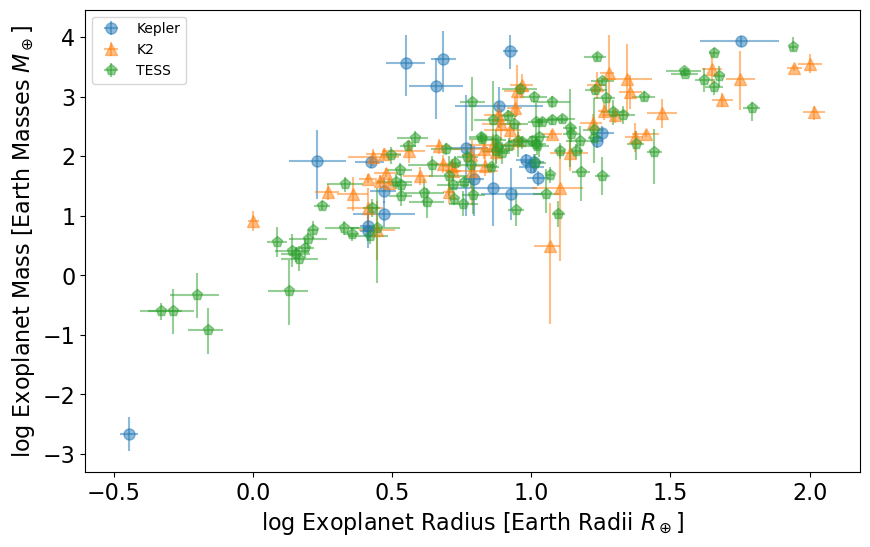

In [89]:
plt.figure(figsize = (10,6))
plt.errorbar(Krlog, Kmlog, xerr = (Kr_erruplog, Kr_errlowlog), yerr = (Km_erruplog, Km_errlowlog),
             linestyle = 'None', marker ='o', alpha = 0.5, ms=8, label = 'Kepler')
plt.errorbar(K2rlog, K2mlog, xerr = (K2r_erruplog, K2r_errlowlog), yerr = (K2m_erruplog, K2m_errlowlog),
             linestyle = 'None', marker ='^', alpha = 0.5, ms=8,  label = 'K2')
plt.errorbar(TESSrlog, TESSmlog, xerr = (TESSr_erruplog, TESSr_errlowlog), yerr = (TESSm_erruplog, TESSm_errlowlog),
             linestyle = 'None', marker ='p', alpha = 0.5, ms=8,  label = 'TESS')

plt.ylabel('log Exoplanet Mass [Earth Masses $M_\oplus$]')
plt.xlabel('log Exoplanet Radius [Earth Radii $R_\oplus$]')

plt.legend(fontsize = 10)
plt.savefig('unfit_MR.png')
plt.rc('font',size=16)
plt.show()

## MCMC fitting

In [90]:
import emcee
import corner

To fit our data, we use the emcee module to perform an MCMC to study the posteriors of two parameters of a linear model $y = ax+b$ to the M-R relationships for exoplanets and stars. Taken from coding lab 7, we note that the posterior is 

\begin{equation}
p(a, b | \{ y_i \}) \propto p(\{ y_i \} | a, b) p(a,b).
\end{equation}

and by assuming uniform prior and gaussian error bars, we can take a gaussian distribution as our likelihood. Since we have error bars for both $y$ and $x$, we need to use a multivariate gaussian distribution. However, we can assume that the covariance between $x$ and $y$ is zero since the method of determining the planet's radius and the method of determining the planet's mass is independent of each other (transit vs. radial velocity): 

\begin{equation}
p(\{ y_i \} | a, b) =  \prod_{i=1}^{n} \frac{\exp\left[-\frac{\left[y_i - a x_i - b\right]^2}{2 \sigma_{y_i}^2} - \frac{\left[x_i - \bar{x}\right]^2}{2 \sigma_{x_i}^2}\right] }{\sqrt{2 \pi \sigma_{y_i} \sigma_{x_i}}}
\end{equation}

In [91]:
def log_prior(theta):
    a, b = theta
    if -1.0 < a < 3. and -5. < b < 5.:
        return 0.0 # the constant doesn't matter since MCMCs only care about *ratios* of probabilities
    return -np.inf # log(0) = -inf

def log_likelihood(theta, x, y, xerr, yerr):
    a, b = theta
    model = a * x + b
    sigmay = yerr ** 2
    sigmax = xerr **2
    #term1 = (y - model) ** 2 / sigma2 + np.log(sigma2)
    return -0.5 * np.sum((y - model) ** 2 / sigmay + (x - np.mean(x)) ** 2 / sigmax + np.log(np.sqrt(sigmay*sigmax))) # the 2pi factor doesn't affect the shape

def log_post(theta, x, y, xerr, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, xerr, yerr)

In [92]:
num_iter = 2000
ndim = 2 # number of parameters
nwalkers = 200
initial_pos = np.array((0.5, 0.0)) + 0.01 * np.random.randn(nwalkers, ndim)

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_post, args=(Rplog, Mplog, Rp_erruplog, Mp_erruplog))
sampler.run_mcmc(initial_pos, num_iter, progress=True);

100%|███████████████████████████████████████| 2000/2000 [13:55<00:00,  2.39it/s]


In [93]:
samples = sampler.get_chain()

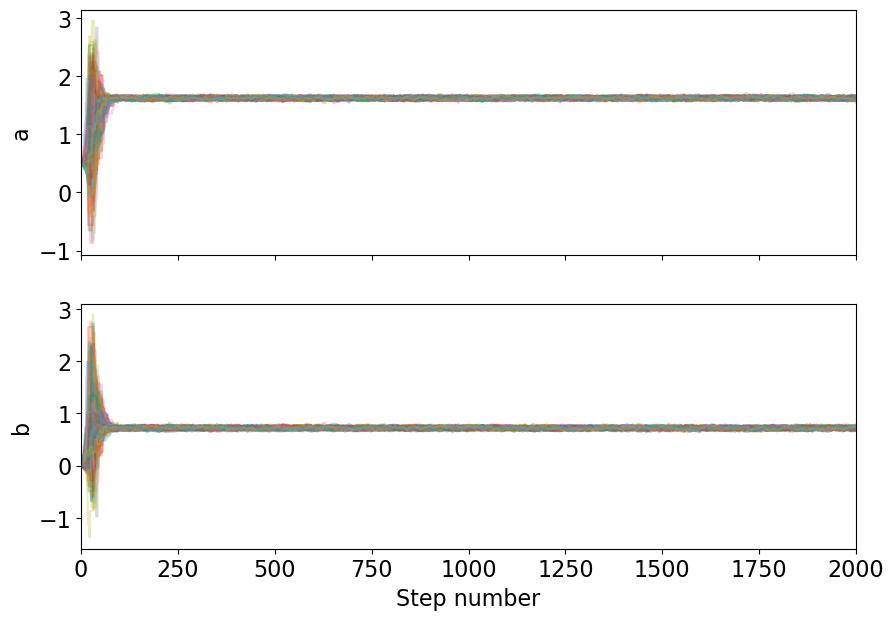

In [94]:
f, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a", "b"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("Step number");

By inspection we deicided to discard the first 100 interations to eliminate the burn-in phase.

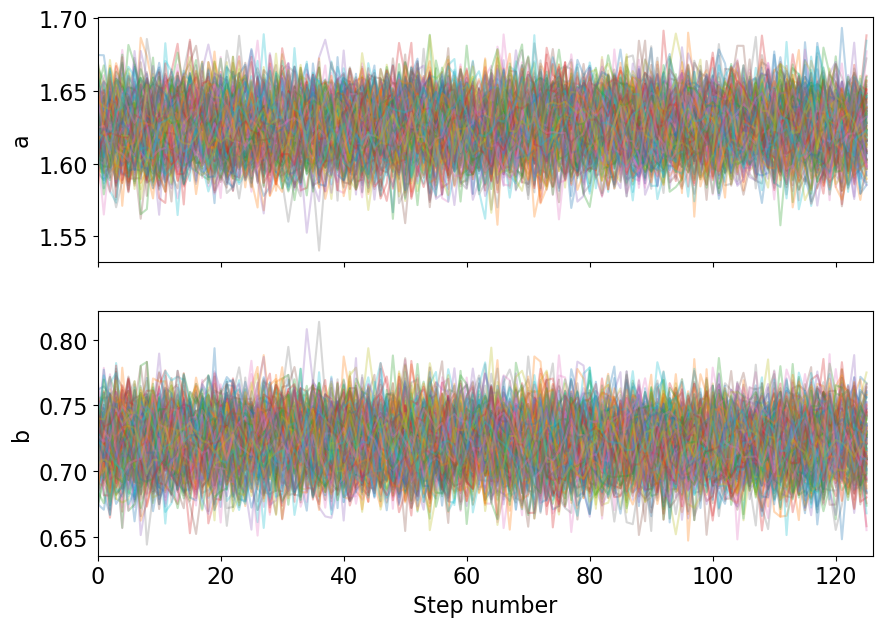

In [95]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat = True)

samples = sampler.get_chain(discard=100, thin = 15)
f, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
labels = ["a", "b"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :,i], alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])

axes[-1].set_xlabel("Step number");
plt.rc('font',size=16)
#plt.savefig('traceplots.png')

To visualize our posteriors for $a$ and $b$, we can use Corner. We've marked the median and the 16th/84th percentiles so that you can see what the 68% credibility region looks like for each parameter:

Quantiles:
[(0.16, 1.606865257940805), (0.5, 1.6250951679184373), (0.84, 1.6437099720236017)]
Quantiles:
[(0.16, 0.7009217046799998), (0.5, 0.7216269787227836), (0.84, 0.742225630188492)]


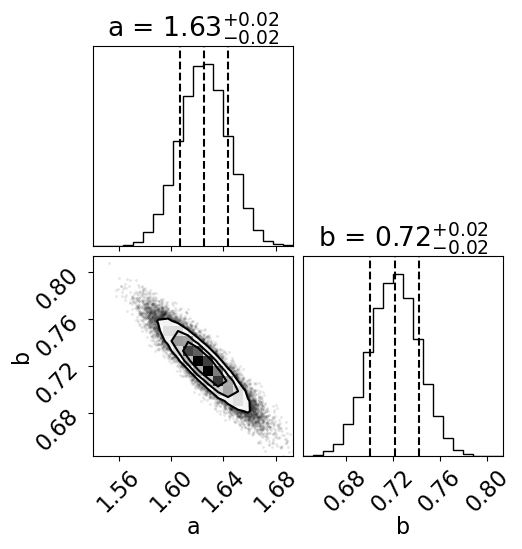

In [96]:
fig = corner.corner(flat_samples, labels=labels, quantiles=[0.16, 0.5, 0.84], verbose = True, show_titles = True);
plt.rc('font',size=16)

#plt.savefig('cornerplots.png')

Now we can plot representative fits for our M-R relationships

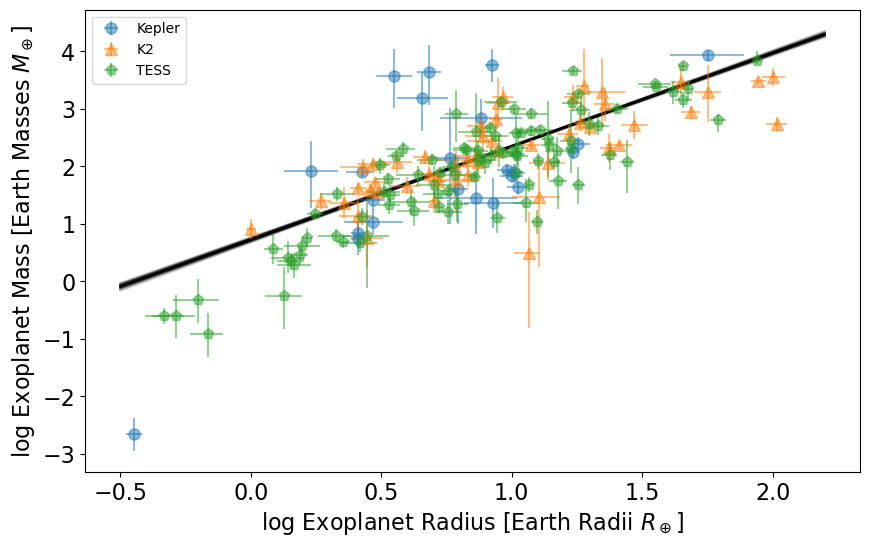

In [97]:
inds = np.random.randint(len(flat_samples), size=100)
x0 = np.linspace(-0.5, 2.2, 13)
f, ax = plt.subplots(figsize=(10,6))
for ind in inds:
    sample = flat_samples[ind]
    ax.plot(x0, sample[0] * x0 + sample[1], alpha=0.05, color='black')

plt.errorbar(Krlog, Kmlog, xerr = (Kr_erruplog, Kr_errlowlog), yerr = (Km_erruplog, Km_errlowlog),
             linestyle = 'None', marker ='o', alpha = 0.5, ms=8, label = 'Kepler')
plt.errorbar(K2rlog, K2mlog, xerr = (K2r_erruplog, K2r_errlowlog), yerr = (K2m_erruplog, K2m_errlowlog),
             linestyle = 'None', marker ='^', alpha = 0.5, ms=8,  label = 'K2')
plt.errorbar(TESSrlog, TESSmlog, xerr = (TESSr_erruplog, TESSr_errlowlog), yerr = (TESSm_erruplog, TESSm_errlowlog),
             linestyle = 'None', marker ='p', alpha = 0.5, ms=8,  label = 'TESS')

plt.ylabel('log Exoplanet Mass [Earth Masses $M_\oplus$]')
plt.xlabel('log Exoplanet Radius [Earth Radii $R_\oplus$]')

plt.legend(fontsize = 10)
plt.rc('font',size=16)
plt.savefig('MCMC_MRfit.png')
plt.show()

With our newly estimated parameters, we can compare with how they translate to a power law fit for the data before the log was taken.

In [98]:
a = 1.63
b = 0.72
aerr = 0.02
berr = 0.02

Rp = np.array(sorted(Rp))

C = np.exp(b)
power_law = C*Rp**a
power_lawmax = C*np.exp(0.02)*Rp**(a+0.02)
power_lawmin = C*np.exp(-0.02)*Rp**(a-0.02)

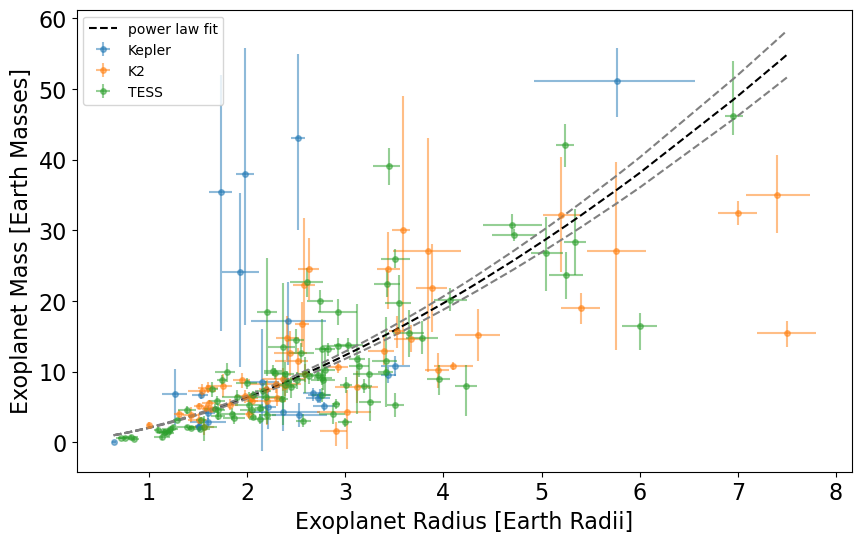

In [99]:
plt.figure(figsize = (10,6))
plt.errorbar(Kr, Km, xerr = (Kr_errup, Kr_errlow), yerr = (Km_errup, Km_errlow),
             linestyle = 'None', marker ='.', alpha = 0.5, ms=8, label = 'Kepler')
plt.errorbar(K2r, K2m, xerr = (K2r_errup, K2r_errlow), yerr = (K2m_errup, K2m_errlow),
             linestyle = 'None', marker ='.', alpha = 0.5, ms=8,  label = 'K2')
plt.errorbar(TESSr, TESSm, xerr = (TESSr_errup, TESSr_errlow), yerr = (TESSm_errup, TESSm_errlow),
             linestyle = 'None', marker ='.', alpha = 0.5, ms=8,  label = 'TESS')

plt.plot(Rp, power_law, color = 'black', linestyle = '--', label = 'power law fit')
plt.plot(Rp, power_lawmax, color = 'grey', linestyle = '--')
plt.plot(Rp, power_lawmin, color = 'grey', linestyle = '--')

plt.ylabel('Exoplanet Mass [Earth Masses]')
plt.xlabel('Exoplanet Radius [Earth Radii]')

plt.legend(fontsize = 10)
plt.savefig('powerlaw_MR.png')
plt.show()

## BATMAN simulations

To discuss limitations on our data, we can use BATMAN to simulate light transit curves for hypothetical small planets that are smaller than the smallest detected exoplanets for each host star. By comparing the apparent magnitude of the percentage dip of relative flux during transit with the limiting magnitude of the telescope which would correspond to the noise level, we can determine the miminum radii for a planet to be detected for a particular host star. From here we can discuss whether we are missing planets for our fits which could indicate we have a bias.

In [100]:
import batman

params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = .1                       #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening mode

In [101]:
t = np.linspace(-0.05, 0.05, 100)

In [102]:
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

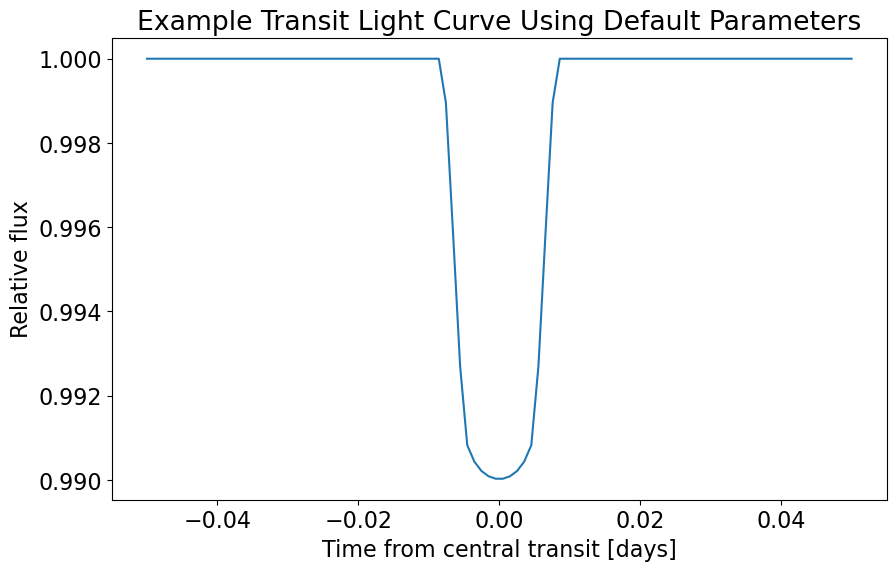

In [103]:
f = plt.figure(figsize=(10,6))

plt.plot(t, flux)
plt.xlabel("Time from central transit [days]")
plt.ylabel("Relative flux")
plt.title('Example Transit Light Curve Using Default Parameters')
plt.rc('font',size=16)
plt.show()

Using the BATMAN simulated curve module, we want to discuss how the limiting magnitude of a telescope can limit the detection of smaller radii planets. As an example, we use the limiting magnitude of 22 for the Kepler telescope and convert it into a "noise level" amplitude or relative flux difference. We plot this as a horizontal line with our simulated transit light curves for a particular planet and it's host star. As the radius decreases, the transit light curve gets closer to the noise level amplitude, and thus it will be harder to distinguish that planet from noise.

In [104]:
# helpful values for unit conversions
Re = 6371  # km
Rsun = 696340  # km
Ms = 1.989e30  # kg
distance_sun = 4.8642e-6  # in pc
m_sun = -26.74  # apparent magnitude of the sun

# obtaining smallest planet radii from Kepler sample
host_names = np.array(list(set(K['st_rad'])))  # unique host names
rps = np.zeros(len(host_names))

for i in range(len(host_names)):
    host = host_names[i]
    s = K[K['st_rad'] == host]
    rps[i] = min(s['pl_rade'])  # planet detected for each host star with minimum radius
    
# only keeping minimum radii for each host star in Kepler sample
for i in K['pl_rade']:
    if i not in rps:
        K.drop(K.index[(K["pl_rade"] == i)], axis=0, inplace = True)
        
K

/var/folders/r_/2kvmn65x4v37fc2w46t4tz9c0000gn/T/ipykernel_65482/1915368218.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  K.drop(K.index[(K["pl_rade"] == i)], axis=0, inplace = True)


,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
1850,KOI-142 b,KOI-142,1,3,Transit,2013,Kepler,0,10.916470,0.000140,...,-1.9910,13.209,0.126,-0.126,11.454,0.019,-0.019,13.1048,0.000275,-0.000275
1898,Kepler-101 b,Kepler-101,1,2,Transit,2014,Kepler,0,3.487681,0.000007,...,-14.7985,13.700,0.069,-0.069,12.011,0.020,-0.020,13.5672,0.000214,-0.000214
2083,Kepler-114 b,Kepler-114,1,3,Transit,2014,Kepler,0,5.188549,0.000012,...,-1.3085,13.961,0.103,-0.103,11.366,0.022,-0.022,13.7125,0.000285,-0.000285
2160,Kepler-120 b,Kepler-120,1,2,Transit,2014,Kepler,0,6.312501,0.000008,...,-3.1870,14.995,0.012,-0.012,12.307,0.024,-0.024,14.7188,0.000282,-0.000282
2279,Kepler-129 c,Kepler-129,1,3,Transit,2014,Kepler,0,82.200000,0.000000,...,-4.3080,11.809,0.022,-0.022,10.252,0.019,-0.019,11.6437,0.000209,-0.000209
2402,Kepler-138 b,Kepler-138,1,4,Transit,2014,Kepler,0,10.313400,0.000300,...,-0.1070,13.040,0.092,-0.092,9.506,0.011,-0.011,12.4715,0.000239,-0.000239
2767,Kepler-1655 b,Kepler-1655,1,1,Transit,2018,Kepler,0,11.872879,0.000008,...,-0.9820,11.045,0.010,-0.010,9.785,0.017,-0.017,11.0141,0.000413,-0.000413
3277,Kepler-231 b,Kepler-231,1,2,Transit,2014,Kepler,0,10.065275,0.000027,...,-3.2810,15.813,0.057,-0.057,12.589,0.026,-0.026,15.3896,0.000606,-0.000606
3362,Kepler-26 c,Kepler-26,1,4,Transit,2011,Kepler,0,17.255900,0.000600,...,-3.0565,15.853,0.035,-0.035,12.630,0.026,-0.026,15.4089,0.000469,-0.000469
3381,Kepler-267 b,Kepler-267,1,3,Transit,2014,Kepler,0,3.353728,0.000007,...,-2.4925,16.690,0.200,-0.200,12.485,0.024,-0.024,15.4693,0.000629,-0.000629


In [105]:
# calculating relative star flux to solar flux
K_stmass = np.array(K['st_mass'])  # in solar masses
K_stdist = np.array(K['sy_dist'])  # in pc

K_Lum = (K_stmass)**3.5  # units of solar luminosity
K_flux = K_Lum*(distance_sun)**2 / (K_stdist)**2  # relative flux in F*/Fsolar
K_ms = -2.5*np.log10(K_flux) + m_sun # apparent magnitude of stars

K_noise = 10**((22-K_ms)/(-2.5)) # relative flux for noise with limiting magnitude of 22 for Kepler telescope

We focused on the minimum planet radii for each host star because we want to see what is the "threshold" planet radii for a particular host star such that the percentage dip of flux is comparable to the noise level. 

In [106]:
# minimum planet radii to host star radii ratio (parameter for BATMAN)
K_radius = np.array(((K['pl_rade'])/K['st_rad']) * (Re/Rsun))

## Kepler Simulation

To illustrate that relatively smaller radii planets will create shallower transit light curves for a particular host star, we took 40% of the radius of the example planet KOI-142 b with it's host star KOI-142. This 40% was chosen by trial and error, and was chosen only to show that for a planet with the same orbital parameters as KOI-142 b, but 40% of the radii, would only cause a decrease in flux that is comparable with noise caused by the limiting magnitude of the instrument, and may not be able to be able to be distinguished from the noise. In fact, 40% seems to be very close to the threshold of radii that Kepler would be able to detect around KOI-142.

In [107]:
import random

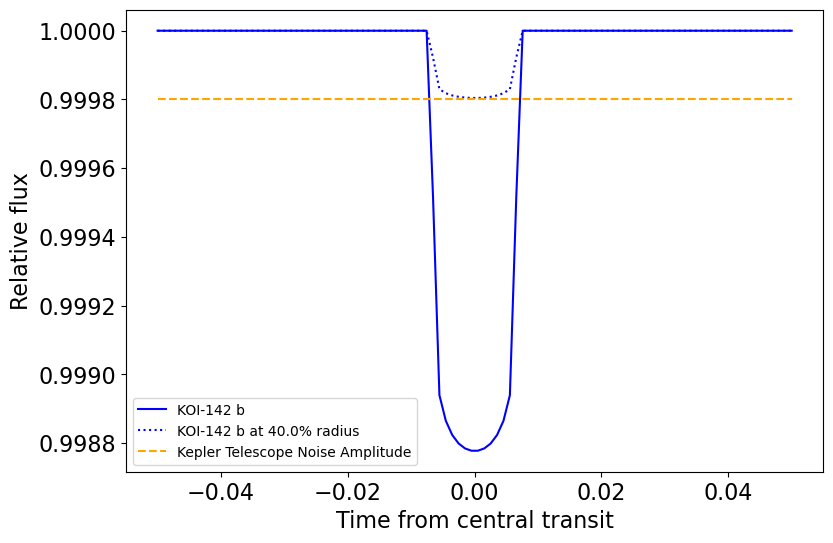

In [108]:
percent_change = 0.4

K_example = np.array([K_radius[0], K_radius[0]*percent_change]).flatten()
planet_names = np.array(K['pl_name'])

n_sims = len(K_example)
flux_sims = np.zeros((n_sims, len(t)))

t = np.linspace(-0.05, 0.05, 100)
names = [str(planet_names[0]), str(planet_names[0]) + ' at '+ str(percent_change*100) + '% radius']
linestyles = ['-', ':']

f, ax = plt.subplots(figsize=(9,6))
for i in range(n_sims):
    params.rp = K_example[i]
    
    m1 = batman.TransitModel(params, t)    
    f1 = m.light_curve(params)

    # Obtain clean light curves
    flux_sims[i] = f1
    
    ax.plot(t,flux_sims[i], c = 'blue', linestyle = linestyles[i], label = names[i])

y = np.full(len(t), 1-K_noise[0])
ax.plot(t,y, c = 'orange', linestyle = '--', label = 'Kepler Telescope Noise Amplitude')     

plt.xlabel("Time from central transit", fontsize = 16)
plt.ylabel("Relative flux", fontsize = 16)
plt.legend(fontsize = 10)
plt.rc('font',size=16)
plt.savefig('transit_curve.png')
plt.show()